# Exploring deep sea acoustic events

## Applied Data Science Meetup
### Portland Data Science Group

### 2020 Feb meetup series
### John Burt

### Session details

For February’s four session meetup series we’ll be working with long term hydrophone recordings from University of Hawaii's Aloha Cabled Observatory (ACO - http://aco-ssds.soest.hawaii.edu), located at a depth of 4728m off Oahu. The recordings span a year and contain many acoustic events: wave movements, the sound of rain, ship noise, possible bomb noises, geologic activity and whale calls and songs. There is a wide range of project topics to explore: identifying and counting acoustic events such as whale calls, measuring daily or seasonal noise trends, measuring wave hydrodynamics, etc.

### This notebook:

Example code showing how to read the audio clip data using the librosa audio analysis package.

This example reads the "every other hour for 1 year" recording. Other recordings can be accessed similarly


In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd
pd.options.display.max_columns = 100

import numpy as np

import librosa
import librosa.display

# dir containing sound files
srcdir = './data/every_other_hour'


## Read clip paths from recording folder

- Parses date/time for each clip
- Sorts clips by time


In [22]:
import os
import fnmatch
from datetime import datetime,timedelta  

def read_clipnames(srcdir):
    """Walk through base folder and collect paths for all sound files.
        parse date and time info, sort, and return as a dataframe"""
    
    clipexts=['*.mp3']
    datefmt='%Y-%m-%d--%H.%M.mp3'

    # search through source folder for sound files
    # save clip path and date (parsed from filename)
    clippath = []
    clipdate = []
    for ext in clipexts:
        for root, dirnames, filenames in os.walk(srcdir):
            for filename in fnmatch.filter(filenames, ext):
                clippath.append(os.path.join(root, filename).replace('\\','/'))
                clipdate.append(datetime.strptime(filename, datefmt))
                
    # get sort index
    idx = np.argsort(clipdate)
    # retun sorted dataframe
    return pd.DataFrame({'date': np.array(clipdate)[idx], 
                       'path':  np.array(clippath)[idx]})   
    
df = read_clipnames(srcdir)

## Read audio data and plot spectrographs and waveforms of several clips

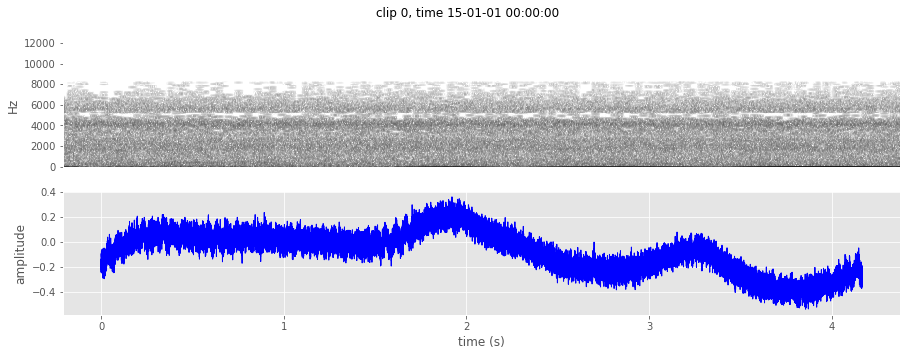

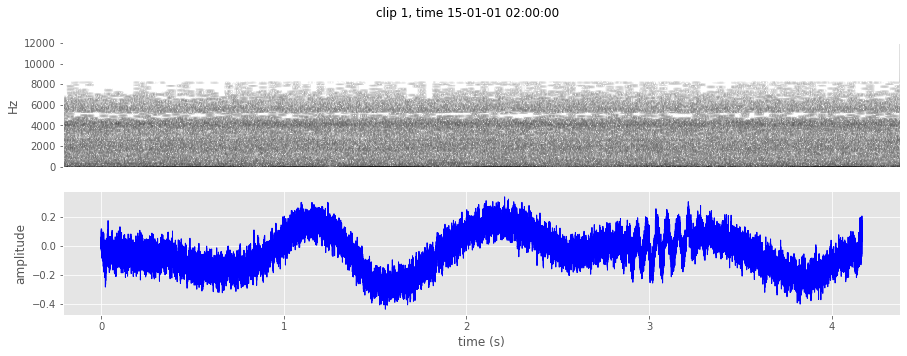

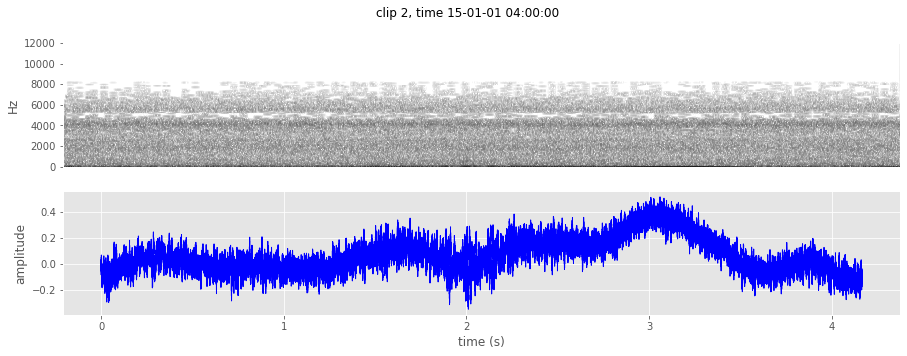

In [40]:
numclips = 3
hoplength=None
fftsize=256
numsamps=100000

# read and plot some sound clips
for i, (dt, path) in df.iloc[:numclips].iterrows():
    # convert mp3 to audio samples
    y, sr = librosa.load(path, sr=None)
    y = y[:numsamps]

    # abs date-time of each sample (disable - takes to long)
    #x = [dt+timedelta(seconds=t) for t in np.arange(0,len(y))/sr]

    # time of each sample (seconds rel to clip start)
    x = np.arange(0,len(y))/sr
    
    # calc spectrograph
    D = librosa.stft(np.array(y), hop_length=hoplength, n_fft=fftsize)
    
    # Pre-compute a global reference power from the input spectrum
    rp = np.max(np.abs(D))
    
    plt.figure(figsize=(15,5))
    plt.suptitle('clip %d, time %s'%(i, dt.strftime('%y-%m-%d %H:%M:00')))

    # display spectrograph
    plt.subplot(2,1,1)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(D),ref=rp), 
                             sr=sr, y_axis='linear',cmap='Greys')
    
    # plot waveform
    plt.subplot(2,1,2)
    plt.plot(x, y, 'b-', linewidth=1)
    plt.xlabel('time (s)')
    plt.ylabel('amplitude');
